# Introduction

Real-world data rarely comes clean, they always come with quality and tidiness issues. Data used for analysis also rarely come from one source. They are aggregated from various sources, accessed for quality and tidiness, and modified to make it clean before analysis. This is known as **Data Wrangling**. 

This data wrangling project involves tweet archive of Twitter user, `@dog_rates`, also known as `WeRateDogs`. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The three steps in data wrangling - Gathering, Accessing and Cleaning was implemented in this project, using python and its libraries. **Twelve quality issues** and **three tidiness issues** were addressed.

In [23]:
#Importing the necessary libraries
import requests
import os
import pandas as pd
import tweepy
from timeit import default_timer as timer
import json
import numpy as np

## Gathering Data

In [2]:
# reading the twitter archive data
tweets_arcv = pd.read_csv('twitter_archive_enhanced.csv')

In [2]:
# Downloading the image predictions programmatically from udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Checking whether the dowmload was successful
response

<Response [200]>

In [3]:
#create and open a tsv file to write the downloaded image predictions in binary mode
with open('image_predictions.tsv', mode = 'wb') as file:
        file.write(response.content)

In [3]:
# Reading the image predictions data
image_prediction = pd.read_csv('image_predictions.tsv',sep='\t')

In [9]:
# Accessing the retweets and favorite counts for WeRateDogs
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [23]:
tweet_ids = tweets_arcv.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 283


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 283


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [4]:
# Read the json data(tweetID, favoriteCount, retweetCount) line by line into a dictionary and convert same to a dataframe
tweet_add = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
 
        tweet_add.append({'tweet_id': data['id_str'],
         'retweet_count': data['retweet_count'],
         'favorite_count': data['favorite_count']
        })

# Converting the read json data to a pandas dataframe
tweet_json = pd.DataFrame(tweet_add, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Accessing Data

In [57]:
tweets_arcv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [56]:
# Accessisng the tweet_arcv table programmatically
tweets_arcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
# Checking the expanded_url records.
#It has records with more than one urls and records not associated with twitter
count = 0
for i, row in tweets_arcv.iterrows():
    if (isinstance(row.expanded_urls, str)):
   
        if 'twitter' not in row.expanded_urls:
            print(row.expanded_urls)
            count+=1
        
print(count)

https://vine.co/v/5W2Dg3XPX7a,https://vine.co/v/5W2Dg3XPX7a
http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_
https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr
http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_
https://vine.co/v/5QWd3LZqXxd,https://vine.co/v/5QWd3LZqXxd
https://vine.co/v/5QWd3LZqXxd
https://vine.co/v/5ghHLBMMdlV,https://vine.co/v/5ghHLBMMdlV
https://vine.co/v/5FwUWjYaW0Y
https://vine.co/v/eEZXZI1rqxX,https://vine.co/v/eEZXZI1rqxX
https://vine.co/v/iqMjlxULzbn,https://vine.co/v/iqMjlxULzbn
https://vine.co/v/5BYq6hmrEI3,https://vine.co/v/5BYq6hmrEI3
https://vine.co/v/ea0OwvPTx9l
https://vine.co/v/5wPT1aBxPQZ
https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3
https://vine.co/v/OEppMFbejFz,https://vine.co/v/OEppMFbe

In [54]:
# The expanded_url columns has records with duplicate urls
tweets_arcv.sample(5).expanded_urls.values

array(['https://twitter.com/dog_rates/status/676949632774234114/photo/1',
       'https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1',
       'https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1',
       'https://twitter.com/dog_rates/status/772114945936949249/photo/1',
       'https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1'],
      dtype=object)

In [29]:
# Number of records with null values in the expanded_urls column
tweets_arcv[tweets_arcv['expanded_urls'].isnull()].shape[0]

59

In [15]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7699,36155
1,892177421306343426,5694,31188
2,891815181378084864,3777,23487
3,891689557279858688,7867,39449
4,891327558926688256,8475,37662
...,...,...,...
2320,666049248165822465,40,96
2321,666044226329800704,131,272
2322,666033412701032449,41,112
2323,666029285002620928,42,121


In [27]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [41]:
# Return the rating_denominator values counts in sorted order
tweets_arcv.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [42]:
# Return the rating_numerator values counts in sorted order
tweets_arcv.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [43]:
# Return the dog names counts in sorted order
tweets_arcv.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

#### Checking for records with more than one stage

In [195]:
df = tweets_arcv[~((tweets_arcv.doggo == tweets_arcv.floofer) & (tweets_arcv.doggo == tweets_arcv.pupper) & (tweets_arcv.doggo == tweets_arcv.puppo))] 
stage_df = df[(df.doggo != 'None') & ((df.floofer != 'None') | (df.pupper != 'None') | (df.puppo != 'None'))]
stage_df.shape[0]

14

In [80]:
stage_df = df[(df.floofer != 'None') & ( (df.pupper != 'None') | (df.puppo != 'None'))]
stage_df.shape[0]

0

In [81]:
stage_df = df[(df.pupper != 'None') &  (df.puppo != 'None')]
stage_df.shape[0]

0

There are 14 records with more than one dog stage and they are only between `doggo` and others.

### Quality

#### `tweets_arcv`
- erroneous datatype - tweet_id
- `tweets_arcv` **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp** columns, indicates retweets or duplicates
- Missing values (**expanded_url** column).
- **expanded_url** column contains duplicate url for a record.
- **expanded_url** column contains urls that are not linked to twitter eg https://vine.co/v/5uZYwqmuDeT
- **source** column contains unnecessary html tag text, instead of the utility name used to post the tweet.
- Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp and timestamp columns).
- **rating_numerator** column has values less than 10 and some very large numbers (e.g. 204)
- **rating_denominator** column has values other than 10
- Erroneous dog names
- Records with more than one dog stage

#### `tweet_json table`
- Missing rows (2325) out of 2356

#### `image_prediction table`
- Missing rows (2075) out of 2356
- Erroneous datatype (tweet_id).

### Tidiness

- `tweets_arcv` records without duplicates should have null values for retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns and should be dropped.
- One variable **dog_stage** in four columns (doggo, floofer, pupper and puppo) in `image_prediction` table.
- *retweet_count* and *favorite_count* columns from `tweet_json` table should be joined with `tweet_arcv` table

## Cleaning Data

In [68]:
# Make a copy of tweets_arcv and image_prediction for our data cleaning process
arch_clean = tweets_arcv.copy()
image_pred_clean = image_prediction.copy()

### Quality

#### erroneous datatype - tweet_id

#### Define
Change the datatype to object.

#### Code

In [69]:
arch_clean.tweet_id = arch_clean.tweet_id.astype('str')

#### Test

In [49]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### `tweets_arcv`- Missing values (expanded_url column).

#### Define
Drop the null values in the expanded_urls column.

#### Code

In [70]:
arch_clean = arch_clean[~arch_clean.expanded_urls.isnull()]

#### Test

In [43]:
assert (sum(arch_clean.expanded_urls.isnull())== 0)


#### **`image_prediction`**- Missing rows (2075) out of 2356

#### Define
The extra rows in the tweet_arcv table do not have image prediction. Delete the extra rows.

#### Code

In [71]:
arch_clean = arch_clean[arch_clean.tweet_id.isin(image_prediction.tweet_id)]

#### Test

In [95]:
assert (sum(~arch_clean.tweet_id.isin(image_prediction.tweet_id)) == 0)

#### **`source`** column contains unnecessary html tag text, instead of the utility name used to post the tweet.

In [20]:
arch_clean.source.values[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### Define
Extract the Utility name from the tag.

#### Code

In [72]:
arch_clean['source'] = arch_clean.source.str.extract(r'>(.*)<')

#### Test

In [11]:
arch_clean.source.value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

#### `image_predictions table` Erroneous datatype (tweet_id)

#### Define
Convert the datatype to object

#### Code

In [73]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('str')

#### Test

In [74]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `tweets_arcv` retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, indicates retweets or duplicates

#### Define
Delete the rows with non-null values.

#### Code

In [75]:
arch_clean = arch_clean.query('retweeted_status_id != retweeted_status_id')

#### Test

In [76]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

### Tidiness

####  `tweets_arcv` records without duplicates should have null values for retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns and should be dropped.

#### Define
Drop the columns

#### Code

In [77]:
arch_clean = arch_clean.drop(columns = ['retweeted_status_id', 
                                        'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [78]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+

#### retweet_count and favorite_count columns from tweet_json table should be joined with tweet_arcv table

#### Define
Merge `tweet_arcv` and `tweet_json` tables

#### Code

In [79]:
arch_clean = pd.merge(arch_clean, tweet_json, on = 'tweet_id', how = 'left')

In [80]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
 14  retweet_count          1981 non-null   float64
 15  favo

### Quality

#### **`expanded_url`** column contains urls that are not linked to twitter eg https://vine.co/v/5uZYwqmuDeT

After cleaning the tidiness issue of merging the `tweets_arcv` and `tweet_json` tables, the urls that are not linked to twitter were no longer in the `arch_clean` table. This is verified in below. 

> This underscores the fact that a more tidy data is easier to clean for quality issues.

#### Test

In [60]:
# Checking for urls not associated with twitter
count = 0
for i, row in arch_clean.iterrows():
    if 'twitter' not in row.expanded_urls:
        count+=1
        
print(count)

0


#### **`expanded_url`** column contains duplicate url for a record.

#### Define
Extract one url from the duplicates.

#### Code

In [81]:
url = arch_clean.expanded_urls.str.split(',', n = 1, expand = True)
arch_clean['expanded_urls'] = url[0]

#### Test

In [62]:
count = 0
for i, row in arch_clean.iterrows():
    assert (len(row.expanded_urls.split()) == 1)

#### records with more than one dog stage

In [82]:
df = arch_clean[~((arch_clean.doggo == arch_clean.floofer) & (arch_clean.doggo == arch_clean.pupper) 
                   & (arch_clean.doggo == arch_clean.puppo))]
print(df[(df.doggo != 'None') & (df.floofer != 'None')].shape[0])
print(df[(df.doggo != 'None') & (df.puppo != 'None')].shape[0])
print(df[(df.doggo != 'None') & (df.pupper != 'None')].shape[0])


1
1
9


#### Define
Observe the records visually to know the correct dog stage

In [64]:
for i, row in df[((df.doggo != 'None') & (df.puppo != 'None')) 
   | ((df.doggo != 'None') & (df.floofer != 'None'))].iterrows():
    print('%s %s\n'%(i, row.text))

148 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

154 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



> **As seen above, the doggo stage is incorrect for the records and should be set to None**

In [65]:
for i, row in df[(df.doggo != 'None') & (df.pupper != 'None')].iterrows():
    print('%s %s\n'%(i, row.text))

340 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

397 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

419 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

425 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

510 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd

652 Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll

704 Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c

For the doggo and pupper, it appears from the texts above that they can be substitutionally used, which was also stated in the digtionary. So, we would make one of them None - `doggo`

#### Code

In [83]:
arch_clean.iloc[148, arch_clean.columns.get_loc('doggo')] = 'None'
arch_clean.iloc[154, arch_clean.columns.get_loc('doggo')] = 'None'

for i, row in df[(df.doggo != 'None') & (df.pupper != 'None')].iterrows():
    arch_clean.iloc[i, arch_clean.columns.get_loc('doggo')] = 'None'


#### Test

In [84]:
arch_clean[(arch_clean.doggo != 'None') & ((arch_clean.floofer != 'None') 
                                           | (arch_clean.pupper != 'None') 
                                           | (arch_clean.puppo != 'None'))].shape[0]

0

####  **rating_denominator** column has values other than 10

#### Define
Extract correctly values almost 10 (10,11,12,13,14,15) and take others to be incorrect ratings

#### Code

In [85]:
arch_clean['rating_denominator'] = arch_clean.text.str.extract(r'/(10|11|12|13|14|15)')

#### Test

In [86]:
#Observing the remaining rows for proper rating 
for i, row in arch_clean[arch_clean.rating_denominator.isnull()].iterrows():
    print('%s\n'%(row.text))

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1

Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12

From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK

Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ

Here we have an entire platoon of puppers. Total score: 88/80 would pet all at

In [87]:
arch_clean.rating_denominator.value_counts()

10    1979
11       3
15       1
12       1
13       1
Name: rating_denominator, dtype: int64

####  **rating_numerator** column has values less than 10 and some very large numbers (e.g. 204)

#### Define
Extract tweet numerator rating that matches the denominator values assumed to be correct when we cleaned the rating denominator above, from the text. (10,11,12,13,14,15) - almost equal than 10. Assume others to be incorrect ratings

#### Code

In [90]:
arch_clean['rating_numerator'] = arch_clean.text.str.extract(r'(\d{1,4})/(10|11|12|13|14|15)')

#### Test

In [89]:
arch_clean.rating_numerator.value_counts()

12      450
10      419
11      397
13      262
9       152
8        95
7        52
14       35
5        33
6        32
3        19
4        15
2         9
1         4
0         2
121       1
26        1
1776      1
75        1
27        1
165       1
144       1
143       1
420       1
Name: rating_numerator, dtype: int64

#### Erroneous dog names

#### Define
Assume names starting with lowercase to be invalid as proper names in the text are begins with an uppercase. Change the invalid names to `None`

#### Code

In [91]:
arch_clean.name = arch_clean.name.str.replace(r'(^[a-z]+)', 'None')

#### Test

In [92]:
assert (arch_clean.name.str.match(r'(^[a-z]+)') == False).all()

#### Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp and timestamp columns)

#### Define
Change the `id` columns to `int64` and `timestamp` columns to `datetime`. The null values would be filled with zeros before the conversion.

#### Code

In [93]:
arch_clean.in_reply_to_status_id = arch_clean.in_reply_to_status_id.fillna(0)
arch_clean.in_reply_to_user_id = arch_clean.in_reply_to_user_id.fillna(0)

arch_clean.in_reply_to_status_id = arch_clean.in_reply_to_status_id.astype('int64')
arch_clean.in_reply_to_user_id = arch_clean.in_reply_to_user_id.astype('int64')

arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

#### Test

In [94]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1985 non-null   object             
 8   rating_denominator     1985 non-null   object             
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

### Tidiness

#### One variable **dog_stage** in four columns (doggo, floofer, pupper and puppo)

#### Define
Combine the four columns into one column named `stage` and drop the four columns

#### Code

In [95]:
# combine the doggo, floofer, pupper and puppo columns into a one column named stage
arch_clean['stage'] = arch_clean[['floofer', 'pupper','doggo', 'puppo']].max(axis=1)

arch_clean.drop(['floofer', 'pupper','doggo', 'puppo'], axis = 1, inplace = True)

#### Test

In [96]:
arch_clean.stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

In [97]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1985 non-null   object             
 8   rating_denominator     1985 non-null   object             
 9   name                   1994 non-null   object             
 10  retweet_count          1981 non-null   float64            
 11  favorite_count         1981 non-null   float64          

## Store the cleaned data

In [99]:
arch_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
image_pred_clean.to_csv('image_predictions_master.csv', encoding='utf-8', index=False)

## Analysing Data

#### In this analysis section, I would import the clean stored data, making the timestamp the row label and parsing the date. This would also useful for the analysis and visualization process

In [100]:
# importing the clean stored data, making the timestamp the row label and parsing the date.
df = pd.read_csv('twitter_archive_master.csv', index_col=3, parse_dates=True)

In [101]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
timestamp,,,,,,,,,,,,
2017-08-01 16:23:56+00:00,892420643555336193,0,0,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,7699.0,36155.0,None
2017-08-01 00:17:27+00:00,892177421306343426,0,0,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,5694.0,31188.0,None
2017-07-31 00:18:03+00:00,891815181378084864,0,0,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,3777.0,23487.0,None
2017-07-30 15:58:51+00:00,891689557279858688,0,0,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,7867.0,39449.0,None
2017-07-29 16:00:24+00:00,891327558926688256,0,0,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,8475.0,37662.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-16 00:24:50+00:00,666049248165822465,0,0,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,40.0,96.0,None
2015-11-16 00:04:52+00:00,666044226329800704,0,0,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,131.0,272.0,None
2015-11-15 23:21:54+00:00,666033412701032449,0,0,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,41.0,112.0,None


In [102]:
# Add columns with year, month name, and weekday name
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['weekday'] = df.index.day_name()

In [103]:
# Distribution of posts on monthly basis
df.month.value_counts()

December     421
November     349
January      235
February     175
March        168
July         137
June         125
May          100
April         95
October       65
September     63
August        61
Name: month, dtype: int64

In [104]:
# The dog stage tweets that has been most liked on average.
df.groupby(['stage']).mean()['favorite_count']

stage
None        7859.170644
doggo      18855.645161
floofer    12511.375000
pupper      6907.438679
puppo      21938.739130
Name: favorite_count, dtype: float64

> Tweets with `puppo` dog stage has been liked the most by **WerateDog** followers

In [105]:
# The dog stage tweets that has been retweeted the most on average.
df.groupby(['stage']).mean()['retweet_count']

stage
None       2286.457637
doggo      6527.354839
floofer    4187.750000
pupper     2159.834906
puppo      6321.086957
Name: retweet_count, dtype: float64

> Tweets with `doggo` dog stage has been retweeted the most by **WerateDog** followers

In [106]:
# The percentage of the tweets that are replies
(df.in_reply_to_status_id != 0).mean()

0.011534603811434303

> About 1% of the tweets are replies

In [107]:
# The duration of the tweets considered for this project
start = df.index.strftime('%Y-%m-%d').min()
end = df.index.strftime('%Y-%m-%d').max()
print(start,',',end)

2015-11-15 , 2017-08-01


> The tweets data were for posts from November 2015 through August 2017

In [108]:
# Distribution of sources for the tweet posts
arch_clean.groupby('source').size()/arch_clean.shape[0]

source
TweetDeck             0.005517
Twitter Web Client    0.014042
Twitter for iPhone    0.980441
dtype: float64

> About 98% of the posts were done using iPhone.

## Visualizing Data

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(8, 4)})

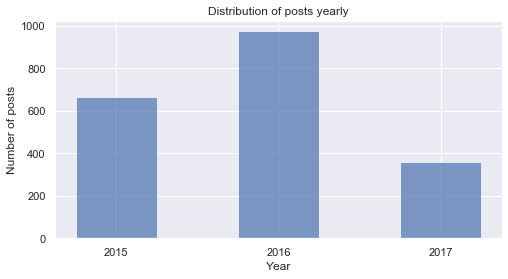

In [110]:
# Distribution of posts across the years
x = df['year']
plt.hist(x, alpha = 0.7, bins = 5);
plt.xlabel("Year")
plt.ylabel("Number of posts")
plt.title('Distribution of posts yearly')
plt.xticks([2015.2,2016,2016.8],[2015, 2016, 2017]);

> The highest number of posts occured in 2016.

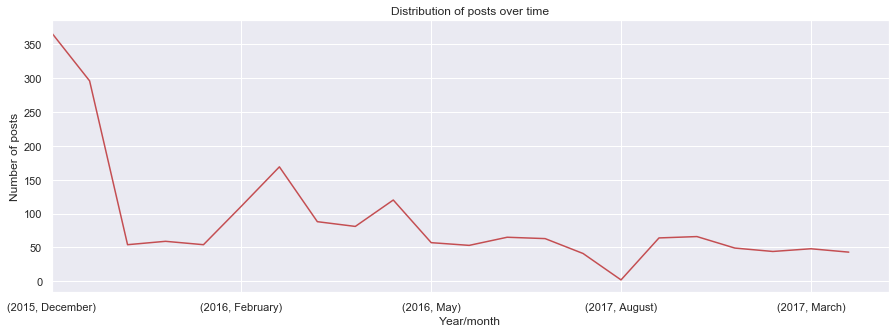

In [114]:
# Distribution of posts over timeb
x = df.groupby(['year','month']).count()['tweet_id']
x.plot(figsize=(15,5), color = 'r');
plt.xlabel("Year/month")
plt.ylabel("Number of posts")
plt.xlim(0)
plt.title('Distribution of posts over time');

> There was a general decrease in the number of posts over the years

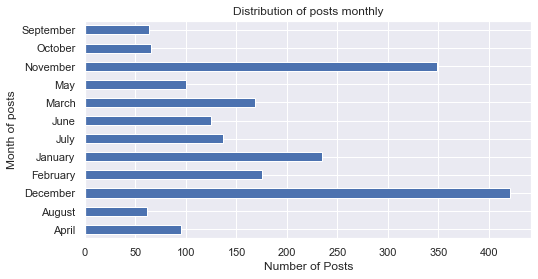

In [115]:
# Distribution of posts monthly
ax = df.groupby(['month']).size()
ax.plot(kind = 'barh');
plt.xlabel("Number of Posts")
plt.ylabel("Month of posts")
plt.title('Distribution of posts monthly');

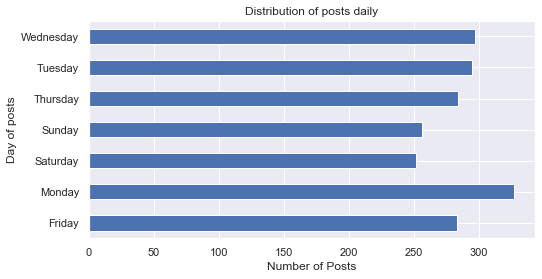

In [116]:
# Distribution of posts daily
ax = df.groupby(['weekday']).size()
ax.plot(kind = 'barh');
plt.xlabel("Number of Posts")
plt.ylabel("Day of posts")
plt.title('Distribution of posts daily');

> As seen above, most posts occurred on Mondays. It could be thought that WerateDog use the weekends to gather more data to be shared with followers the in the coming week. 

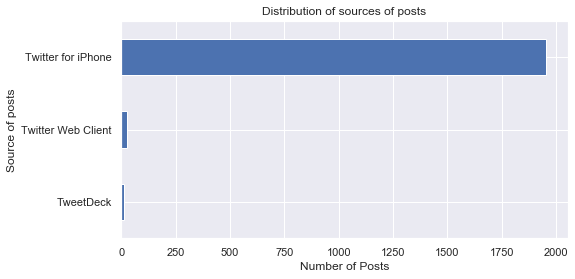

In [117]:
# Distribution of sources of posts
ax = df.groupby(['source']).size()
ax.plot(kind = 'barh');
plt.xlabel("Number of Posts")
plt.ylabel("Source of posts")
plt.title('Distribution of sources of posts');

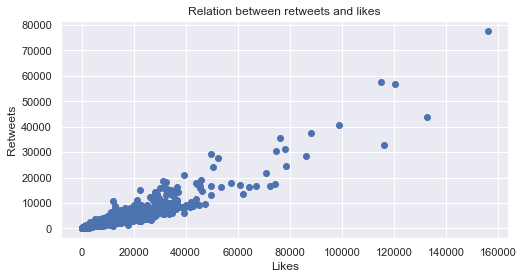

In [118]:
#Relation between retweets and likes
x = df.favorite_count
y = df.retweet_count
plt.scatter(x,y)
plt.title('Relation between retweets and likes')
plt.ylabel('Retweets')
plt.xlabel('Likes');

> There seems to be a positive correlation between retweets and likes. This is most expected as people would want to retweet a liked post.

### Limitations

- The rows with null values in the expanded_urls column in the twitter archive table were assumed to be non-existent and dropped.

- The rating_numerator values whose denominator is greater than 15 and less than 10 were assumed to be invalid.

- The rating_denominator values greater than 15 and less than 10 were assumed to be invalid.

- Only the dog names beginning with an uppercase are assumed to be valid.


### References

https://pynative.com/python-parse-multiple-json-objects-from-file/

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc

https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/